#0. Introdução
A análise abaixo foi feita utilizando dados da IBM disponibilizados pelo site da Kaggle.

Nossa motivação é entender o perfil das pessoas que deixam a empresa. Isso é importante para previnir demissões, diminuir custos operacionais e melhorar a satisfação dos empregados.

Perguntas que tentaremos responder com a análise:


*   Existe uma disparidade salarial entre homens e mulheres
*   Qual relação entre salário e departamento em que o funcionário atua?
*   Existe alguma relaçao entre idade x salário?



#1. Carregando bibliotecas...

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

#2. Carregando dataset

In [4]:
url = "https://raw.githubusercontent.com/Migueuu17/analise-rh/refs/heads/main/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(url, sep=',')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#3. Análise Univariada


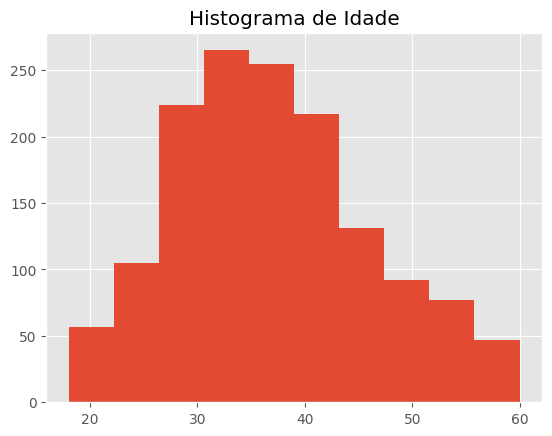

In [8]:
_ = plt.hist(df.Age)
_ = plt.title("Histograma de Idade")

O histograma indica que a maior parte da população analisada está na faixa etária entre 30 e 40 anos, com menor representação nas idades mais baixas e mais altas, ou seja, há menos indivíduos jovens e idosos.

In [9]:
df['Age'].mean()

np.float64(36.923809523809524)

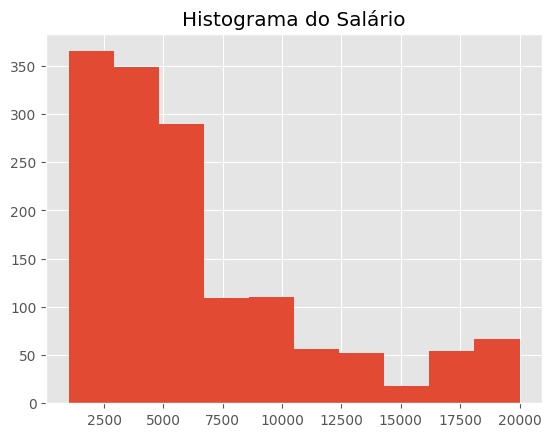

In [10]:
_ = plt.hist(df.MonthlyIncome)
_ = plt.title("Histograma do Salário")

o histograma mostra que a maior parte da população tem salários mais baixos, enquanto uma minoria recebe salários significativamente maiores. Isso é típico de distribuições salariais reais, onde altos salários são menos frequentes.

In [11]:
print(f"A mediana dos salários é R${df['MonthlyIncome'].median()} e a média é R${round(df['MonthlyIncome'].mean(numeric_only=True), 2)}, vale resaltar que os valores deram essa grande diferença pela assimetria, onde influencia a média.")


A mediana dos salários é R$4919.0 e a média é R$6502.93, vale resaltar que os valores deram essa grande diferença pela assimetria, onde influencia a média.


In [12]:
df.Gender.value_counts()

,count
Gender,
Male,882
Female,588


In [13]:
df.Gender.value_counts(1)

,proportion
Gender,
Male,0.6
Female,0.4


Text(0, 0.5, '')

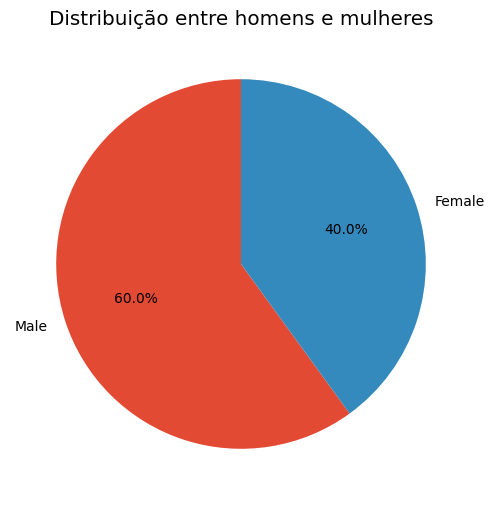

In [14]:
df.Gender.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Distribuição entre homens e mulheres')
plt.ylabel('')

In [15]:
df.EducationField.value_counts()

,count
EducationField,
Life Sciences,606
Medical,464
Marketing,159
Technical Degree,132
Other,82
Human Resources,27


Text(0.5, 0, '')

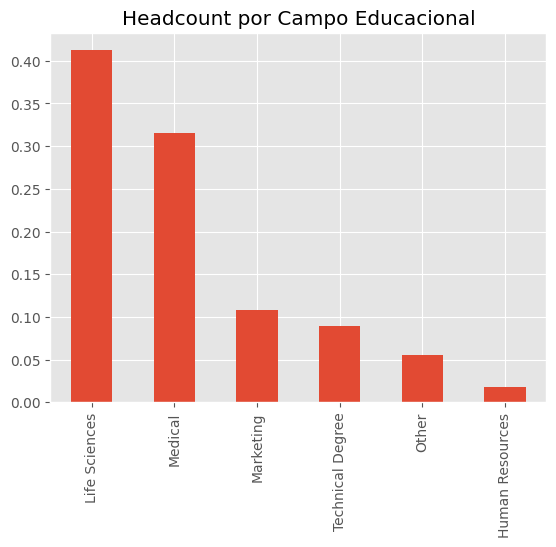

In [16]:
_ = df.EducationField.value_counts(1).plot.bar()
plt.title('Headcount por Campo Educacional')
plt.xlabel('')

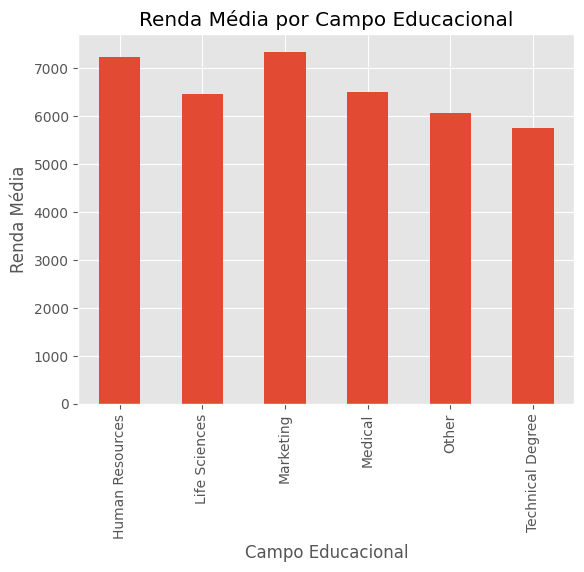

In [17]:
media_area_salario = df.groupby('EducationField')['MonthlyIncome'].mean()

media_area_salario.plot.bar()
plt.title('Renda Média por Campo Educacional')
plt.xlabel('Campo Educacional')
plt.ylabel('Renda Média')
plt.show()

Aqui podemos observar que, apesar da disparidade na quantidade de funcionários na área de 'Life Sciences', a média salarial entre as diferentes áreas de estudo é bastante semelhante.

Uma boa prática seria verificar a mediana dos salários, já que ela é menos influenciada por valores extremos. Isso pode ser feito da seguinte forma:

In [31]:
mediana_area_salario = df.groupby('EducationField')['MonthlyIncome'].median()

df_campo_edu = pd.DataFrame({
    'media': round(media_area_salario, 2),
    'mediana': mediana_area_salario
}).reset_index()

df_campo_edu

,EducationField,media,mediana
0,Human Resources,7241.15,3886.0
1,Life Sciences,6463.29,4943.0
2,Marketing,7348.58,6118.0
3,Medical,6510.04,4722.0
4,Other,6071.55,4561.0
5,Technical Degree,5758.30,4318.0


In [34]:
EF_JL = pd.crosstab(df['EducationField'], df['JobLevel'])
print(EF_JL)

JobLevel            1    2   3   4   5
EducationField                        
Human Resources    13    7   1   2   4
Life Sciences     229  216  87  48  26
Marketing          21   87  32  11   8
Medical           188  153  63  36  24
Other              30   34  11   3   4
Technical Degree   62   37  24   6   3


Aqui podemos observar que, em Human Resources, a mediana diverge consideravelmente da média. Isso ocorreu devido à influência de vários funcionários em cargos de nível 1 (funcionários com salários mais baixos, como será discutido posteriormente na correlação). A média foi impactada pelos altos salários de poucos funcionários, resultando em um valor elevado. Já a mediana, por ser menos sensível a valores extremos, foi puxada para baixo pela maior quantidade de funcionários em cargos 'iniciais'.


#4. Análise Bivariada

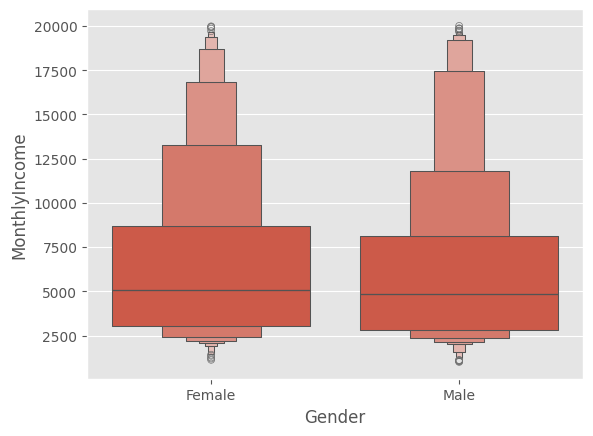

In [20]:
_ = sns.boxenplot(x='Gender', y='MonthlyIncome', data=df)

Conforme indicado pelo boxplot, os salários estão distribuídos de forma semelhante entre os gêneros, sugerindo ausência de disparidades salariais relevantes.

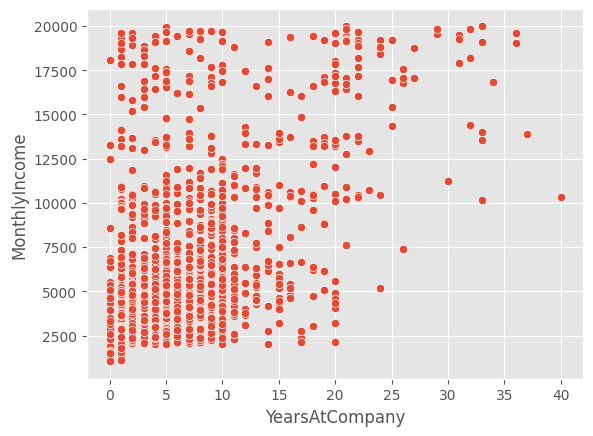

In [21]:
_ = sns.scatterplot(x = 'YearsAtCompany', y = 'MonthlyIncome', data=df)

#5. Análise Multivariada

In [22]:
dfAgeSalario = df[['Age', 'MonthlyIncome']]
dfAgeSalario.corr()

,Age,MonthlyIncome
Age,1.000000,0.497855
MonthlyIncome,0.497855,1.000000


Nesta tabela, é possivel conferir a correlação de idade x salário, onde existe uma correlação positiva

In [23]:
df.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [24]:
remover = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
dfnumeric = df.drop(remover, axis=1)

In [25]:
correlacoes_fortes = dfnumeric.corr()
correlacoes_fortes = correlacoes_fortes[(correlacoes_fortes > 0.8) & (correlacoes_fortes < 1.0)]

In [26]:
correlacoes_fortes

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourlyRate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobInvolvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
dfAgeSalario = df[['JobLevel', 'MonthlyIncome']]
dfAgeSalario.corr()

,JobLevel,MonthlyIncome
JobLevel,1.0000,0.9503
MonthlyIncome,0.9503,1.0000


Nessa multidão de "NaN", é possivel perceber uma correlação positiva entre o Salário e o Nivel Hierarquico de funcionário dentro da empresa.

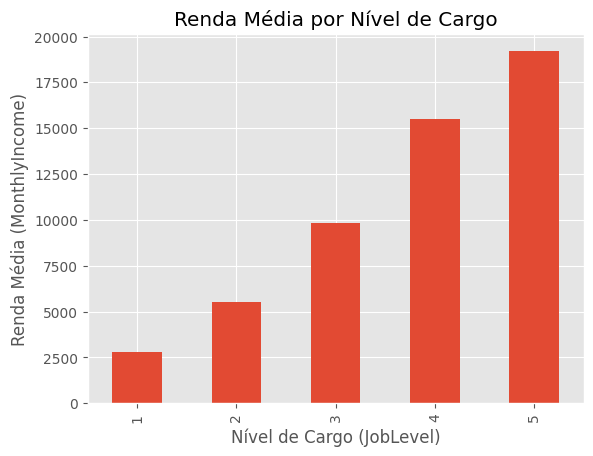

In [28]:
media_salario = df.groupby('JobLevel')['MonthlyIncome'].mean()


media_salario.plot.bar()
plt.title('Renda Média por Nível de Cargo')
plt.xlabel('Nível de Cargo (JobLevel)')
plt.ylabel('Renda Média (MonthlyIncome)')
plt.show()

Este grafico comprova o que foi dito anteriomente, quanto mais subir o nível do cargo, mas o salário sobe

In [29]:
_ = df[['JobLevel', 'YearsAtCompany']]
_.corr()

,JobLevel,YearsAtCompany
JobLevel,1.000000,0.534739
YearsAtCompany,0.534739,1.000000


Aqui se demonstra que existe uma relação até que significativa onde a cada ano dentro da empresa o cargo do funcionário subirá